In [1]:
!pip install yfinance scikit-learn matplotlib pandas seaborn


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 393.8 kB/s eta 0:00:08
      --------------------------------------- 0.0/3.0 MB 393.8 kB/s eta 0:00:08
      --------------------------------------- 0.1/3.0 MB 328.2 kB/s eta 0:00:10
      --------------------------------------- 0.1/3.0 MB 328.2 kB/s eta 0:00:10
     - -------------------------------------- 0.1/3.0 MB 566.5 kB/s eta 0:00:06
     -- ------------------------------------- 0.2/3.0 MB 593.2 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 655.6 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 655.6 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 655.6 kB/s eta 0:00

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
print(data.head())


C:\Users\MOD\AppData\Local\Temp\ipykernel_9164\1574270221.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645645  179.499574  174.425140  174.542917  104487900
2022-01-04  176.378326  179.558442  175.809046  179.254175   99310400
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987549  170.921136  167.868622  169.694241   86709100


In [4]:
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()
features = ['Open', 'High', 'Low', 'Volume']
target = 'Next_Close'

X = data[features]
y = data[target]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)


In [9]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.929153457188957
RMSE: 3.7676112072855483


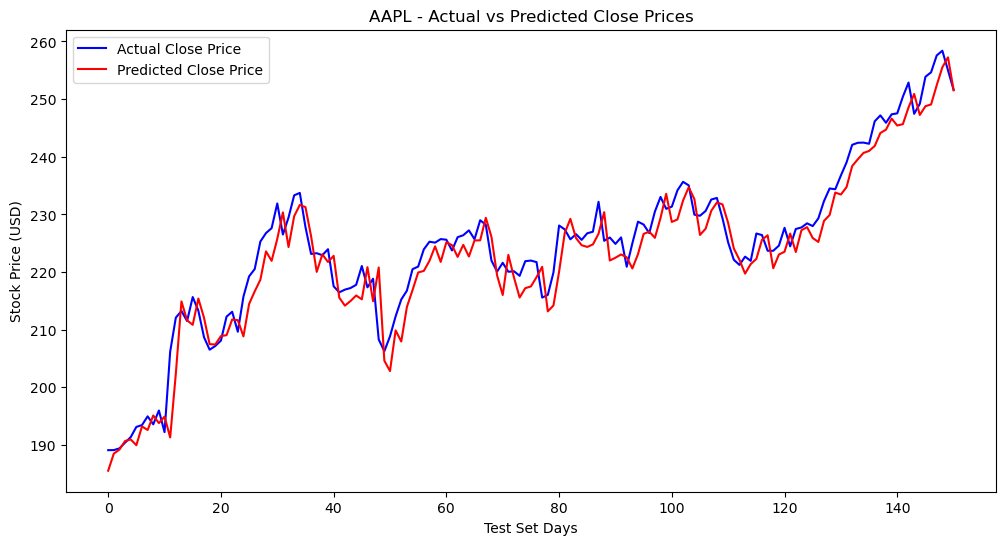

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red')
plt.title(f"{ticker} - Actual vs Predicted Close Prices")
plt.xlabel("Test Set Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()